In [1]:
# basic
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']    #用來正常顯示中文
plt.rcParams['axes.unicode_minus']=False      #用來正常顯示負號
import seaborn as sns
# time
from datetime import datetime

In [2]:
# 導入資料
data = pd.read_csv("railway.csv")
# 整理資料
data = data[['Station','direction','date','time','num','delay','type']].copy()
data.drop(data[data['delay'].isnull()].index, inplace=True)
data.reset_index(drop=True, inplace=True)
# 確認資料
data

,Station,direction,date,time,num,delay,type
0,Fengyuan,0,2020/12/15,0,3147,0.0,4
1,Fengyuan,0,2020/12/15,1,2103,1.0,4
2,Fengyuan,0,2020/12/15,1,3157,1.0,4
3,Fengyuan,0,2020/12/15,1,2601,0.0,4
4,Fengyuan,0,2020/12/15,1,2113,2.0,4
...,...,...,...,...,...,...,...
101101,Yuanlin,1,2021/04/06,0,2728,2.0,4
101102,Yuanlin,1,2021/04/06,0,3262,0.0,4
101103,Yuanlin,1,2021/04/06,0,2294,1.0,4
101104,Yuanlin,1,2021/04/06,0,3268,5.0,4


Text(0.5, 1.0, 'Delay Distribution')

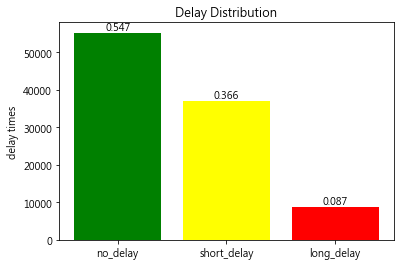

In [3]:
# 觀察delay的種類分布：no_delay, short_delay(1~5), long_delay(6~)
# Prepare the data
no_delay_count = len(data[data['delay']==0])
have_delay = data[data['delay']>0]
short_delay_count = len(have_delay[have_delay['delay']<=5])
long_delay_count = len(have_delay[have_delay['delay']>5])
x = ['no_delay', 'short_delay', 'long_delay']
y = [no_delay_count, short_delay_count, long_delay_count]
# plot
plt.bar(x,y,color=['green','yellow','red'])
for a,b in zip(x,y):
    plt.text(a,b,'%.3f'%(b/sum(y)),ha='center',va='bottom')
plt.ylabel('delay times')
plt.title('Delay Distribution')

### 由上圖可知no delay佔所有資料的大多數<br>long delay則是其中的極少數(可推估為事故發生時才會產生)
## *因此得出若欲訓練正常狀況模型下，只需考慮 no delay 和 short delay 的資料

In [4]:
# 由上面結果，只保留data中no delay和short delay的資料
data.drop(data[data['delay']>5].index, inplace=True)
data.reset_index(drop=True, inplace=True)
data

,Station,direction,date,time,num,delay,type
0,Fengyuan,0,2020/12/15,0,3147,0.0,4
1,Fengyuan,0,2020/12/15,1,2103,1.0,4
2,Fengyuan,0,2020/12/15,1,3157,1.0,4
3,Fengyuan,0,2020/12/15,1,2601,0.0,4
4,Fengyuan,0,2020/12/15,1,2113,2.0,4
...,...,...,...,...,...,...,...
92269,Yuanlin,1,2021/04/06,0,2728,2.0,4
92270,Yuanlin,1,2021/04/06,0,3262,0.0,4
92271,Yuanlin,1,2021/04/06,0,2294,1.0,4
92272,Yuanlin,1,2021/04/06,0,3268,5.0,4


In [5]:
# 將 date column 從實際日期轉移成顯示星期幾(1~7)
for index in range(len(data['date'])):
    date = datetime(year=int(data['date'][index][0:4]),month=int(data['date'][index][5:7]),day=int(data['date'][index][8:]))
    data['date'][index] = date.weekday()+1
data

<ipython-input-5-d64d2b432e10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'][index] = date.weekday()+1


,Station,direction,date,time,num,delay,type
0,Fengyuan,0,2,0,3147,0.0,4
1,Fengyuan,0,2,1,2103,1.0,4
2,Fengyuan,0,2,1,3157,1.0,4
3,Fengyuan,0,2,1,2601,0.0,4
4,Fengyuan,0,2,1,2113,2.0,4
...,...,...,...,...,...,...,...
92269,Yuanlin,1,2,0,2728,2.0,4
92270,Yuanlin,1,2,0,3262,0.0,4
92271,Yuanlin,1,2,0,2294,1.0,4
92272,Yuanlin,1,2,0,3268,5.0,4


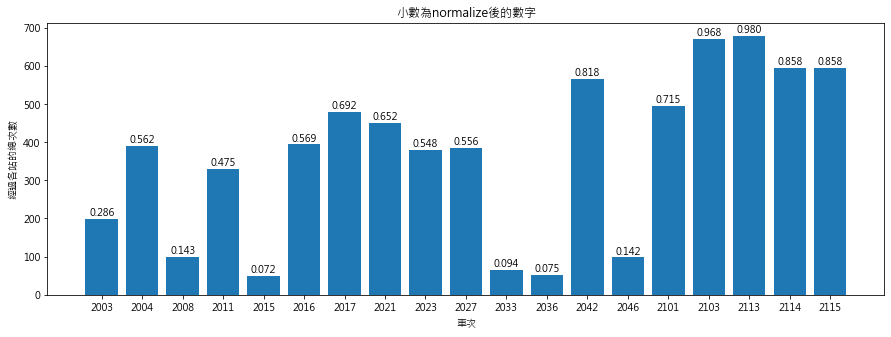

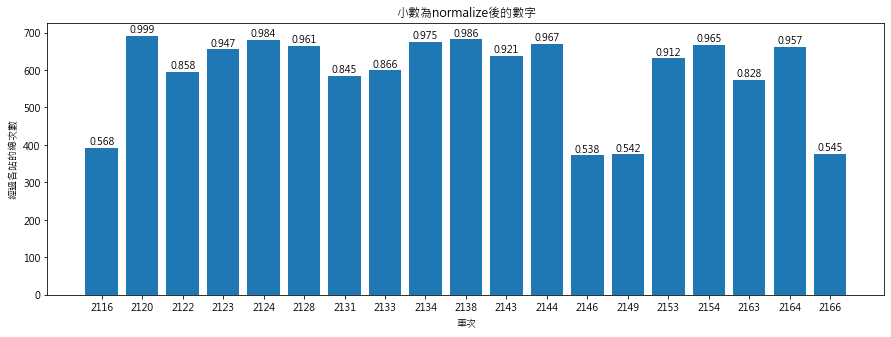

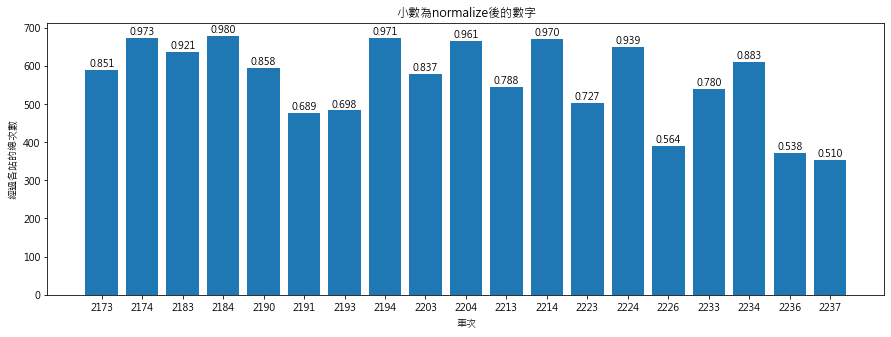

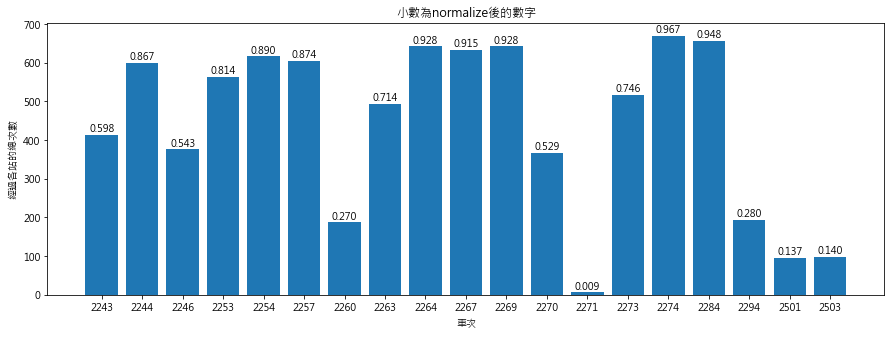

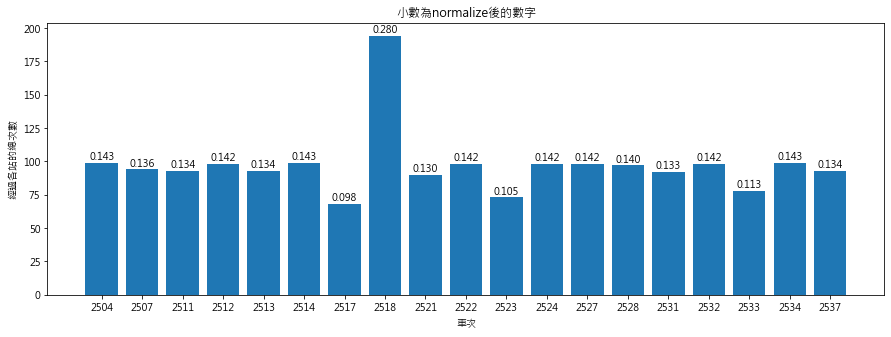

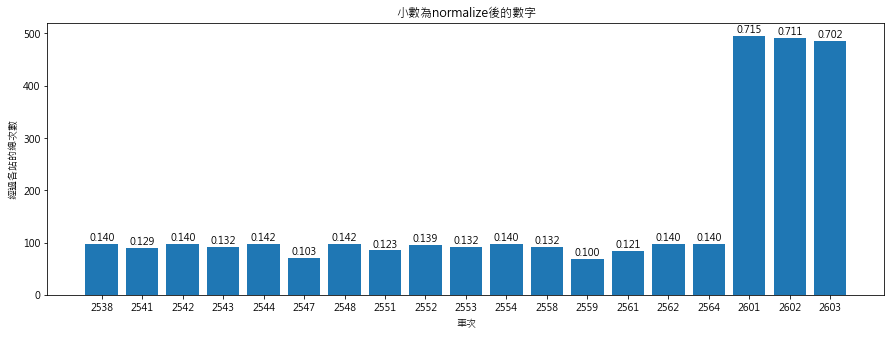

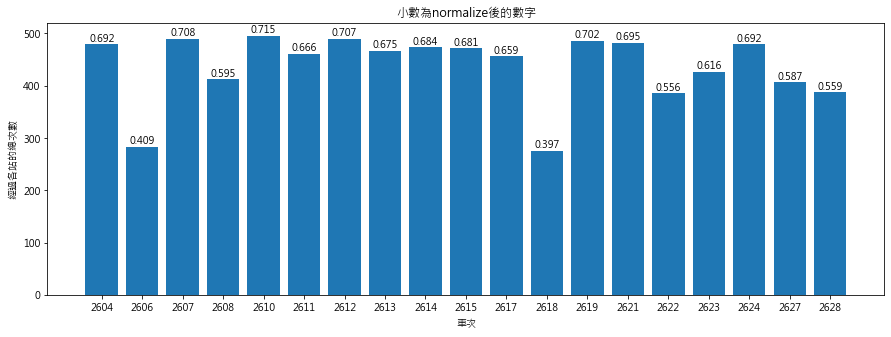

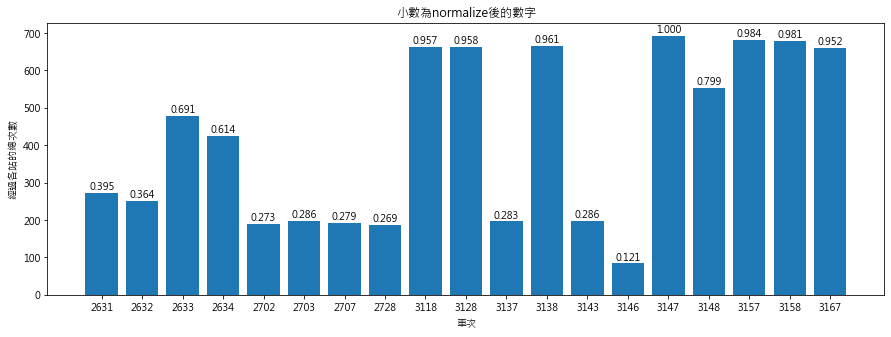

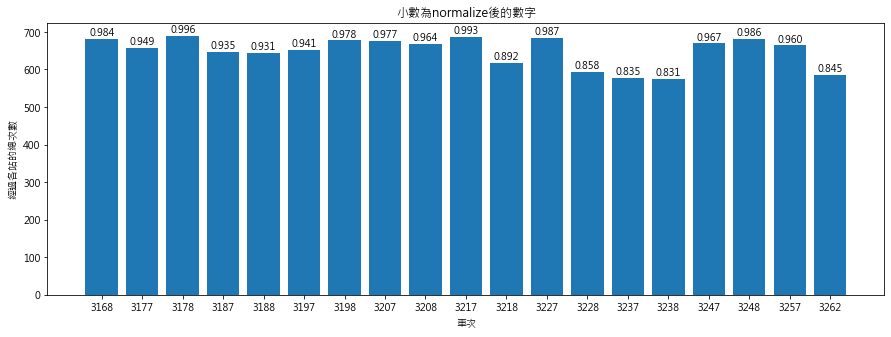

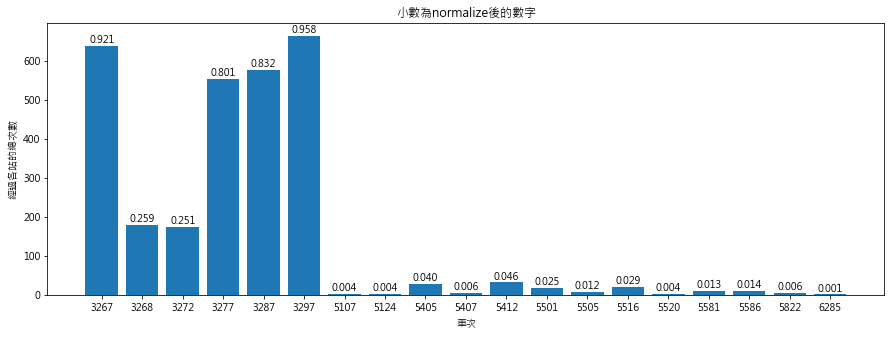

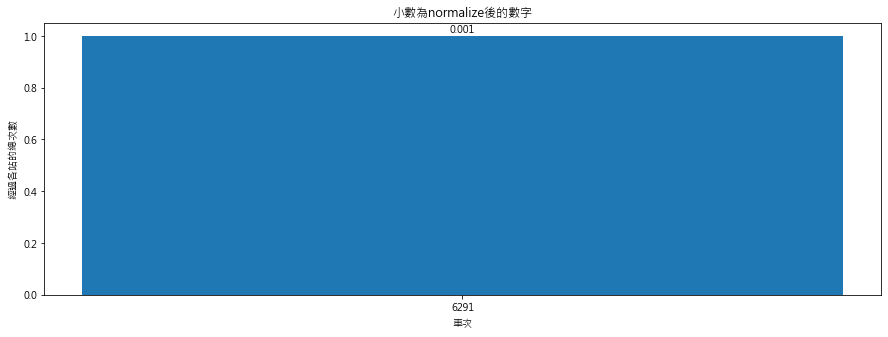

In [6]:
# 所有區間車的次數統計圖
x = [str(num) for num in sorted(list(set(data['num']))) if num > 999]
y = []
for num in x:
    y.append(len(data[data['num']==int(num)]))
max_y = max(y)
# plot
for times in range(1,12):
    plt.figure(figsize=(15,5))
    plt.bar(x[19*(times-1):19*times],y[19*(times-1):19*times])
    for a,b in zip(x[19*(times-1):19*times],y[19*(times-1):19*times]):
        plt.text(a,b,'%.3f'%(b/max_y),ha='center',va='bottom')
    plt.xlabel('車次')
    plt.ylabel('經過各站的總次數')
    plt.title('小數為normalize後的數字')
    plt.show()

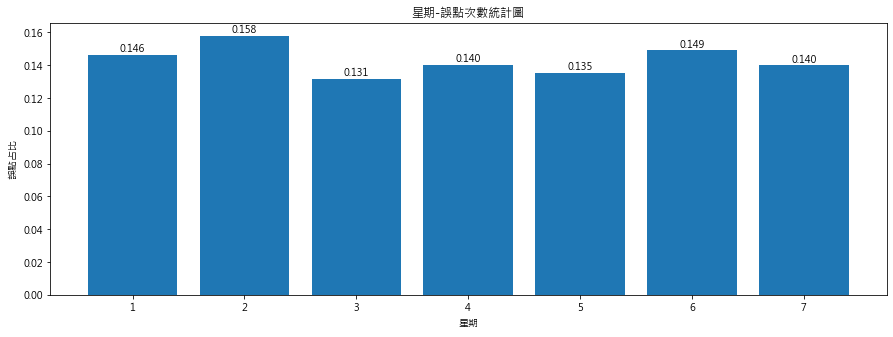

In [12]:
# 統計每個星期的誤點次數(依然是只考慮區間車)
x = [1,2,3,4,5,6,7]            # weekday
y = []                         # 誤點次數
all_have_delay_df = data[data['delay']>0]
for weekday in x:
    weekday_df = data[data['date']==weekday]
    weekday_have_delay_df = weekday_df[weekday_df['delay']>0]
    y.append(len(weekday_have_delay_df.index)/len(all_have_delay_df.index))
plt.figure(figsize=(15,5))
plt.bar(x,y)
for a,b in zip(x,y):
    plt.text(a,b,'%.3f'%b,ha='center',va='bottom')
plt.xlabel('星期')
plt.ylabel('誤點占比')
plt.title('星期-誤點次數統計圖')
plt.show()

## 由上圖可以看出誤點與否和星期幾的關係不大！

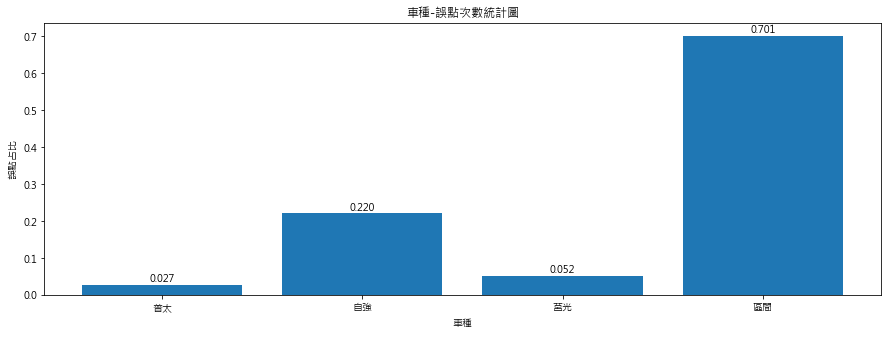

In [15]:
# 統計每個車種的誤點次數
x = {1:'普太',2:'自強',3:'莒光',4:'區間'}                  # 車種代號
y = []
all_have_delay_df = data[data['delay']>0]
for _type in x.keys():
    type_df = data[data['type']==_type]
    type_have_delay_df = type_df[type_df['delay']>0]
    y.append(len(type_have_delay_df.index)/len(all_have_delay_df.index))
plt.figure(figsize=(15,5))
plt.bar(x.values(),y)
for a,b in zip(x.values(),y):
    plt.text(a,b,'%.3f'%b,ha='center',va='bottom')
plt.xlabel('車種')
plt.ylabel('誤點占比')
plt.title('車種-誤點次數統計圖')
plt.show()

## 由上圖可知誤點通常發現在自強和區間這兩個車種上

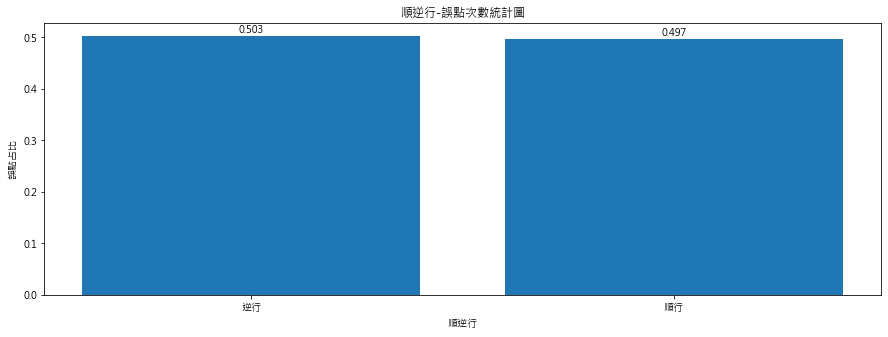

In [16]:
# 統計順逆行分開的誤點次數
x = {0:'逆行', 1:'順行'}
y = []
all_have_delay_df = data[data['delay']>0]
for direction in x.keys():
    direction_df = data[data['direction']==direction]
    direction_have_delay_df = direction_df[direction_df['delay']>0]
    y.append(len(direction_have_delay_df.index)/len(all_have_delay_df))
plt.figure(figsize=(15,5))
plt.bar(x.values(),y)
for a,b in zip(x.values(),y):
    plt.text(a,b,'%.3f'%b,ha='center',va='bottom')
plt.xlabel('順逆行')
plt.ylabel('誤點占比')
plt.title('順逆行-誤點次數統計圖')
plt.show()

## 由上圖可知誤點和順逆行沒有關係

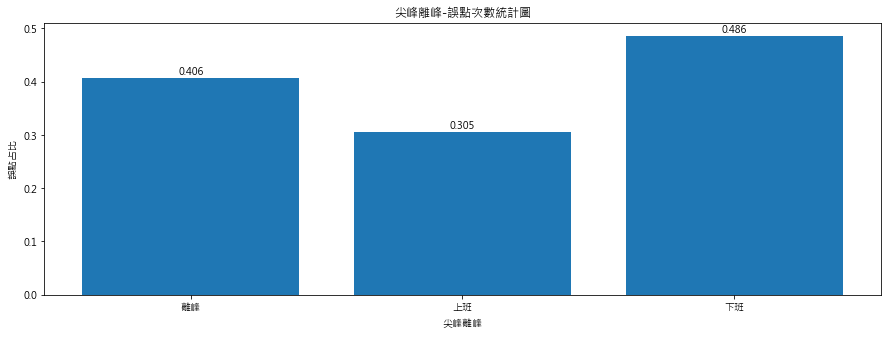

In [22]:
# 統計離峰尖峰時段分開的誤點次數
x = {0:'離峰',1:'上班',2:'下班'}
y = []
all_have_delay_df = data[data['delay']>0]
for time in x.keys():
    time_df = data[data['time']==time]
    time_have_delay_df = time_df[time_df['delay']>0]
    y.append(len(time_have_delay_df.index)/len(time_df.index))
plt.figure(figsize=(15,5))
plt.bar(x.values(),y)
for a,b in zip(x.values(),y):
    plt.text(a,b,'%.3f'%b,ha='center',va='bottom')
plt.xlabel('尖峰離峰')
plt.ylabel('誤點占比')
plt.title('尖峰離峰-誤點次數統計圖')
plt.show()

## 上圖是在說，各個時間區段，發生誤點的比例，並非是佔全體的比例
## 所以可以得知其實下班時段，相較於其他兩個時間區間，更容易發生誤點

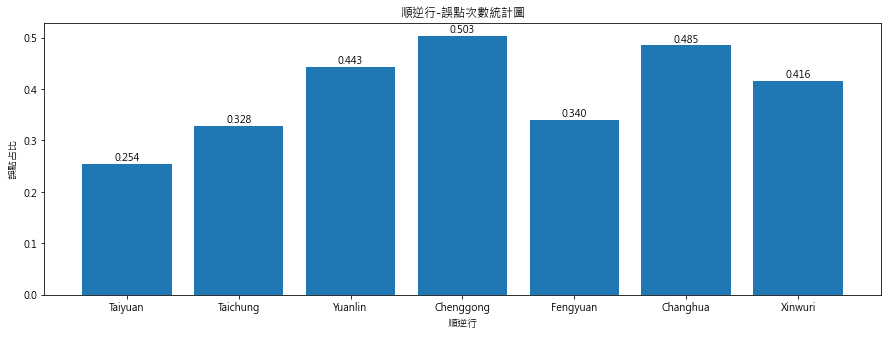

In [25]:
# 統計各站發生誤點次數
x = list(set(data['Station']))
y = []
all_have_delay_df = data[data['delay']>0]
for station in x:
    station_df = data[data['Station']==station]
    station_have_delay_df = station_df[station_df['delay']>0]
    y.append(len(station_have_delay_df.index)/len(station_df.index))
plt.figure(figsize=(15,5))
plt.bar(x,y)
for a,b in zip(x,y):
    plt.text(a,b,'%.3f'%b,ha='center',va='bottom')
plt.xlabel('各站名稱')
plt.ylabel('誤點占比')
plt.title('-誤點次數統計圖')
plt.show()

#